<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
### Import all Libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# list of columns names for the data
columns = ['party affiliation', 'handicapped-infants', 'water-project-cost-sharing', 
            'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
            'el-salvador-aid', 'religious-groups-in-schools', 
            'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
            'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
            'education-spending', 'superfund-right-to-sue', 'crime', 
            'duty-free-exports', 'export-administration-act-south-africa']

In [107]:
# load data from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url,header=None,)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# set column names to names in list above
df.columns=columns

In [118]:
df.head()

,party affiliation,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [119]:
df.shape

(435, 17)

In [121]:
df.describe().T

,count,unique,top,freq
party affiliation,435,2,democrat,267
handicapped-infants,435,3,n,236
water-project-cost-sharing,435,3,y,195
adoption-of-the-budget-resolution,435,3,y,253
physician-fee-freeze,435,3,n,247
el-salvador-aid,435,3,y,212
religious-groups-in-schools,435,3,y,272
anti-satellite-test-ban,435,3,y,239
aid-to-nicaraguan-contras,435,3,y,242
mx-missile,435,3,y,207


In [0]:
# replace no votes with 0, yes votes with 1 and missing votes with -1
df = df.replace({'n': 0, 'y': 1, '?':-1})

In [123]:
df.head()

,party affiliation,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,democrat,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1


In [0]:
# create two new dataframes, one for Republicans and one for Democrats
gop = df[df['party affiliation'] == 'republican']
dem = df[df['party affiliation'] == 'democrat']

In [125]:
gop.shape, dem.shape

((168, 17), (267, 17))

In [0]:
assert df.shape[0] == gop.shape[0] + dem.shape[0]

In [127]:
# drop pary id column to make analysis a little eaiser
gop.drop(columns=['party affiliation'], inplace=True)
dem.drop(columns=['party affiliation'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


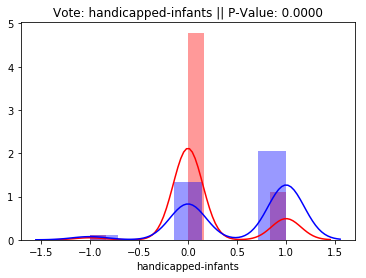

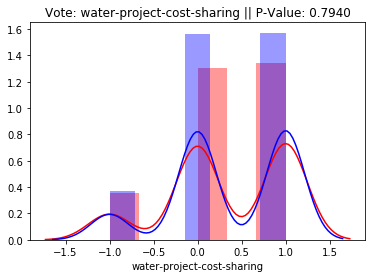

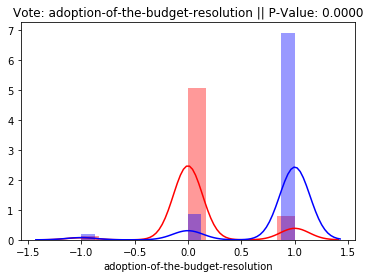

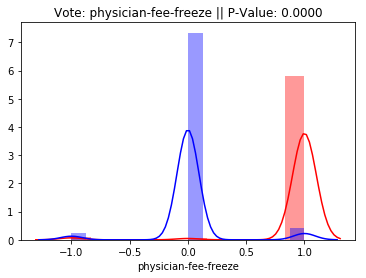

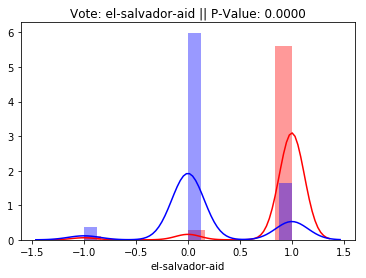

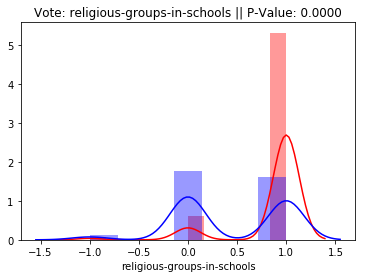

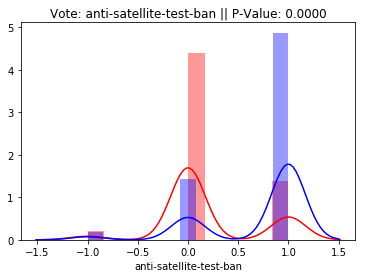

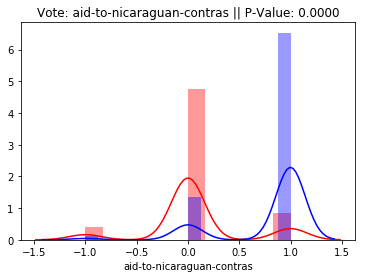

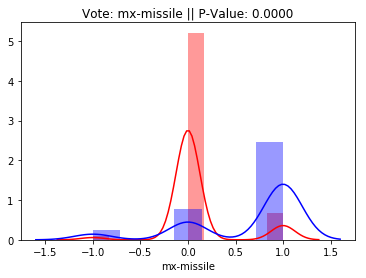

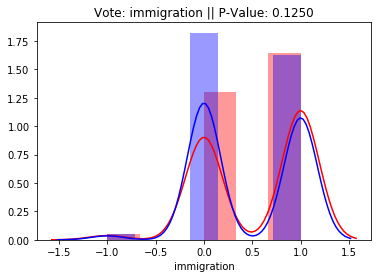

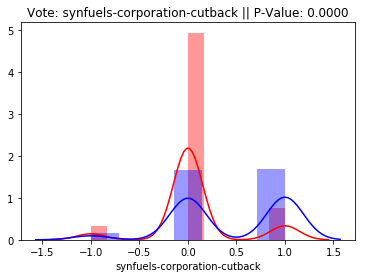

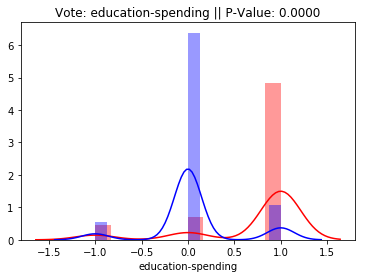

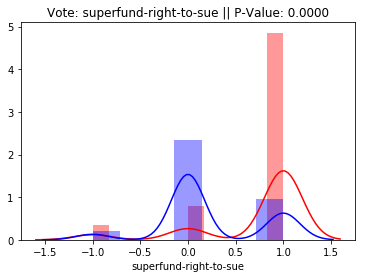

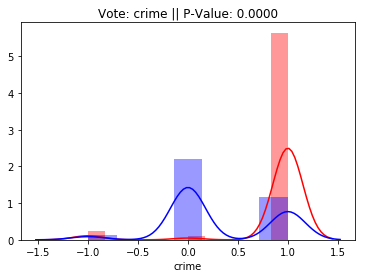

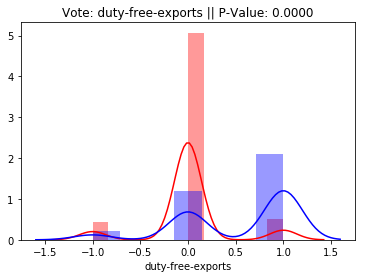

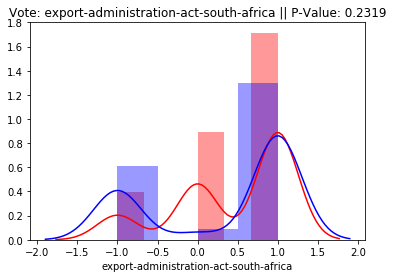

<Figure size 432x288 with 0 Axes>

In [129]:
# create a feature list called votes from the data frame column names
votes = gop.columns

# loop through all the votes and graph the votes that Republican and Democrats made
# Gop in Red, Dem in Blue
for vote in votes:
  sns.distplot(gop[vote], color='red')
  sns.distplot(dem[vote], color='blue')
  stat, pvalue = ttest_ind(gop[vote], dem[vote])
  plt.title(f'Vote: {vote} || P-Value: {pvalue:.4f}')
  plt.figure();

In [143]:
# to get a percentage of party support for a bill set missing votes to no
gop.replace({-1:0})
dem.replace({-1:0})

# loop through all vote, filter by p-value to see if significant at 0.01
# if differences are significant print out which party supported the measure more
# if not significant at 0.01, print out that the difference in party vote is note significantly different
for vote in votes:
  gop_support = gop[vote].sum()/gop[vote].count()
  dem_support = dem[vote].sum()/dem[vote].count()
  
  stat, pvalue = ttest_ind(gop[vote], dem[vote])
  if pvalue < 0.01:
    if gop_support > dem_support:
      print(f'The vote on {vote} has more Republican support than Democratic support with a P-Value of {pvalue:.2f}')
      print('---'*30,'\n')
    elif dem_support > gop_support:
      print(f'The vote on {vote} has more Democratic support than Republican support with a P-Value of {pvalue:.2f}')
      print('---'*30,'\n')
  else:
    print(f'The vote on {vote} with a P-Value of {pvalue:.2f} shows no statistically significant difference between Republican and Democratic support')
    print('---'*30,'\n')

The vote on handicapped-infants has more Democratic support than Republican support with a P-Value of 0.00
------------------------------------------------------------------------------------------ 

The vote on water-project-cost-sharing with a P-Value of 0.79 shows no statistically significant difference between Republican and Democratic support
------------------------------------------------------------------------------------------ 

The vote on adoption-of-the-budget-resolution has more Democratic support than Republican support with a P-Value of 0.00
------------------------------------------------------------------------------------------ 

The vote on physician-fee-freeze has more Republican support than Democratic support with a P-Value of 0.00
------------------------------------------------------------------------------------------ 

The vote on el-salvador-aid has more Republican support than Democratic support with a P-Value of 0.00
---------------------------------------